# Data Processing

- Load image data using PyTorch
- Image transformations
- Preprocess images (resize, crop, normalize)

### Setup drive

Run the following cell to mount your Drive onto Colab. Go to the given URL and once you login and copy and paste the authorization code, you should see "drive" pop up in the files tab on the left.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Click the little triangle next to "drive" and navigate to the "AI4All Chest X-Ray Project" folder. Hover over the folder and click the 3 dots that appear on the right. Select "copy path" and replace `PASTE PATH HERE` with the path to your folder.

In [ ]:
cd "/content/drive/My Drive/AI4All Chest X-Ray Project"

/content/drive/.shortcut-targets-by-id/1iJKbtzLay6C-5OfpVHhbe1nQeNGyhFWO/AI4All Chest X-Ray Project


### Import necessary libraries
Torchvision, or the PyTorch package, consists of popular datasets, model architectures, and common image transformations for computer vision.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random

from torch.utils.data import random_split, Subset

import torchvision
from torchvision import datasets, transforms

from utils.plotting import imshow_dataset
from utils.datahelper import calc_dataset_stats, get_random_image

Torch vision is from pytorch. It is used a lot in data mining. It is good for modifying data.

### Setup paths
Define paths and load metadata

In [ ]:
path_to_dataset = os.path.join('data')

path_to_images = os.path.join(path_to_dataset, 'images')

metadata = pd.read_csv(os.path.join(path_to_dataset, 'metadata_train.csv'))

os.path.join combines paths rather than having to type the entire out.

### Load images

**Pytorch loads the data using sub-folder names as class labels**

Navigate to the "images" folder to see what this means.


In [ ]:
dataset = datasets.ImageFolder(path_to_images, transform=None)
dataset

Dataset ImageFolder
    Number of datapoints: 790
    Root location: data/images

In [ ]:
# EXERCISE: Use the function .class_to_idx to see what our classes are
dataset.class_to_idx

{'covid': 0, 'nofinding': 1}

**Now let's take a look at the images themselves!**

Note: The `imshow_dataset` function is defined in the file `utils/plotting.py`.

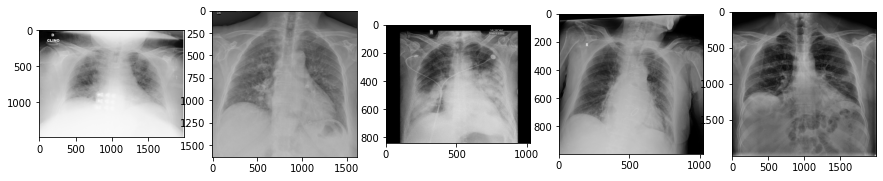

In [ ]:
# plots the first 5 images
imshow_dataset(dataset, n=5)

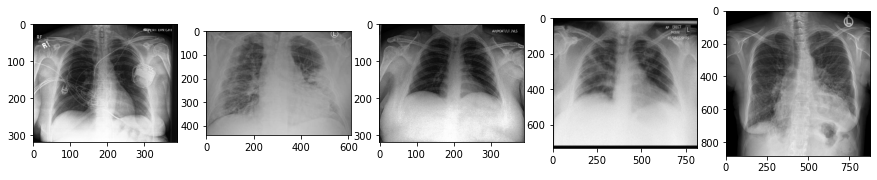

In [ ]:
# plots 5 random images
imshow_dataset(dataset, n=5, rand=True)

Util folder includes extra functions that Ina created to aid the process.


> **Discuss with each other**
>
> What do you notice about the images? What are their dimensions?



The images are all different dimensions, so it is important to resize and crop them so that we can compare the images to each other.

### Transformations
The transforms module in PyTorch defines various transformations that can be performed on an image. 

Image transformations are used to pre-process images
as well as to "augment" the data. (We will discuss data augmentation in another section.)


**Resize the image using transforms**

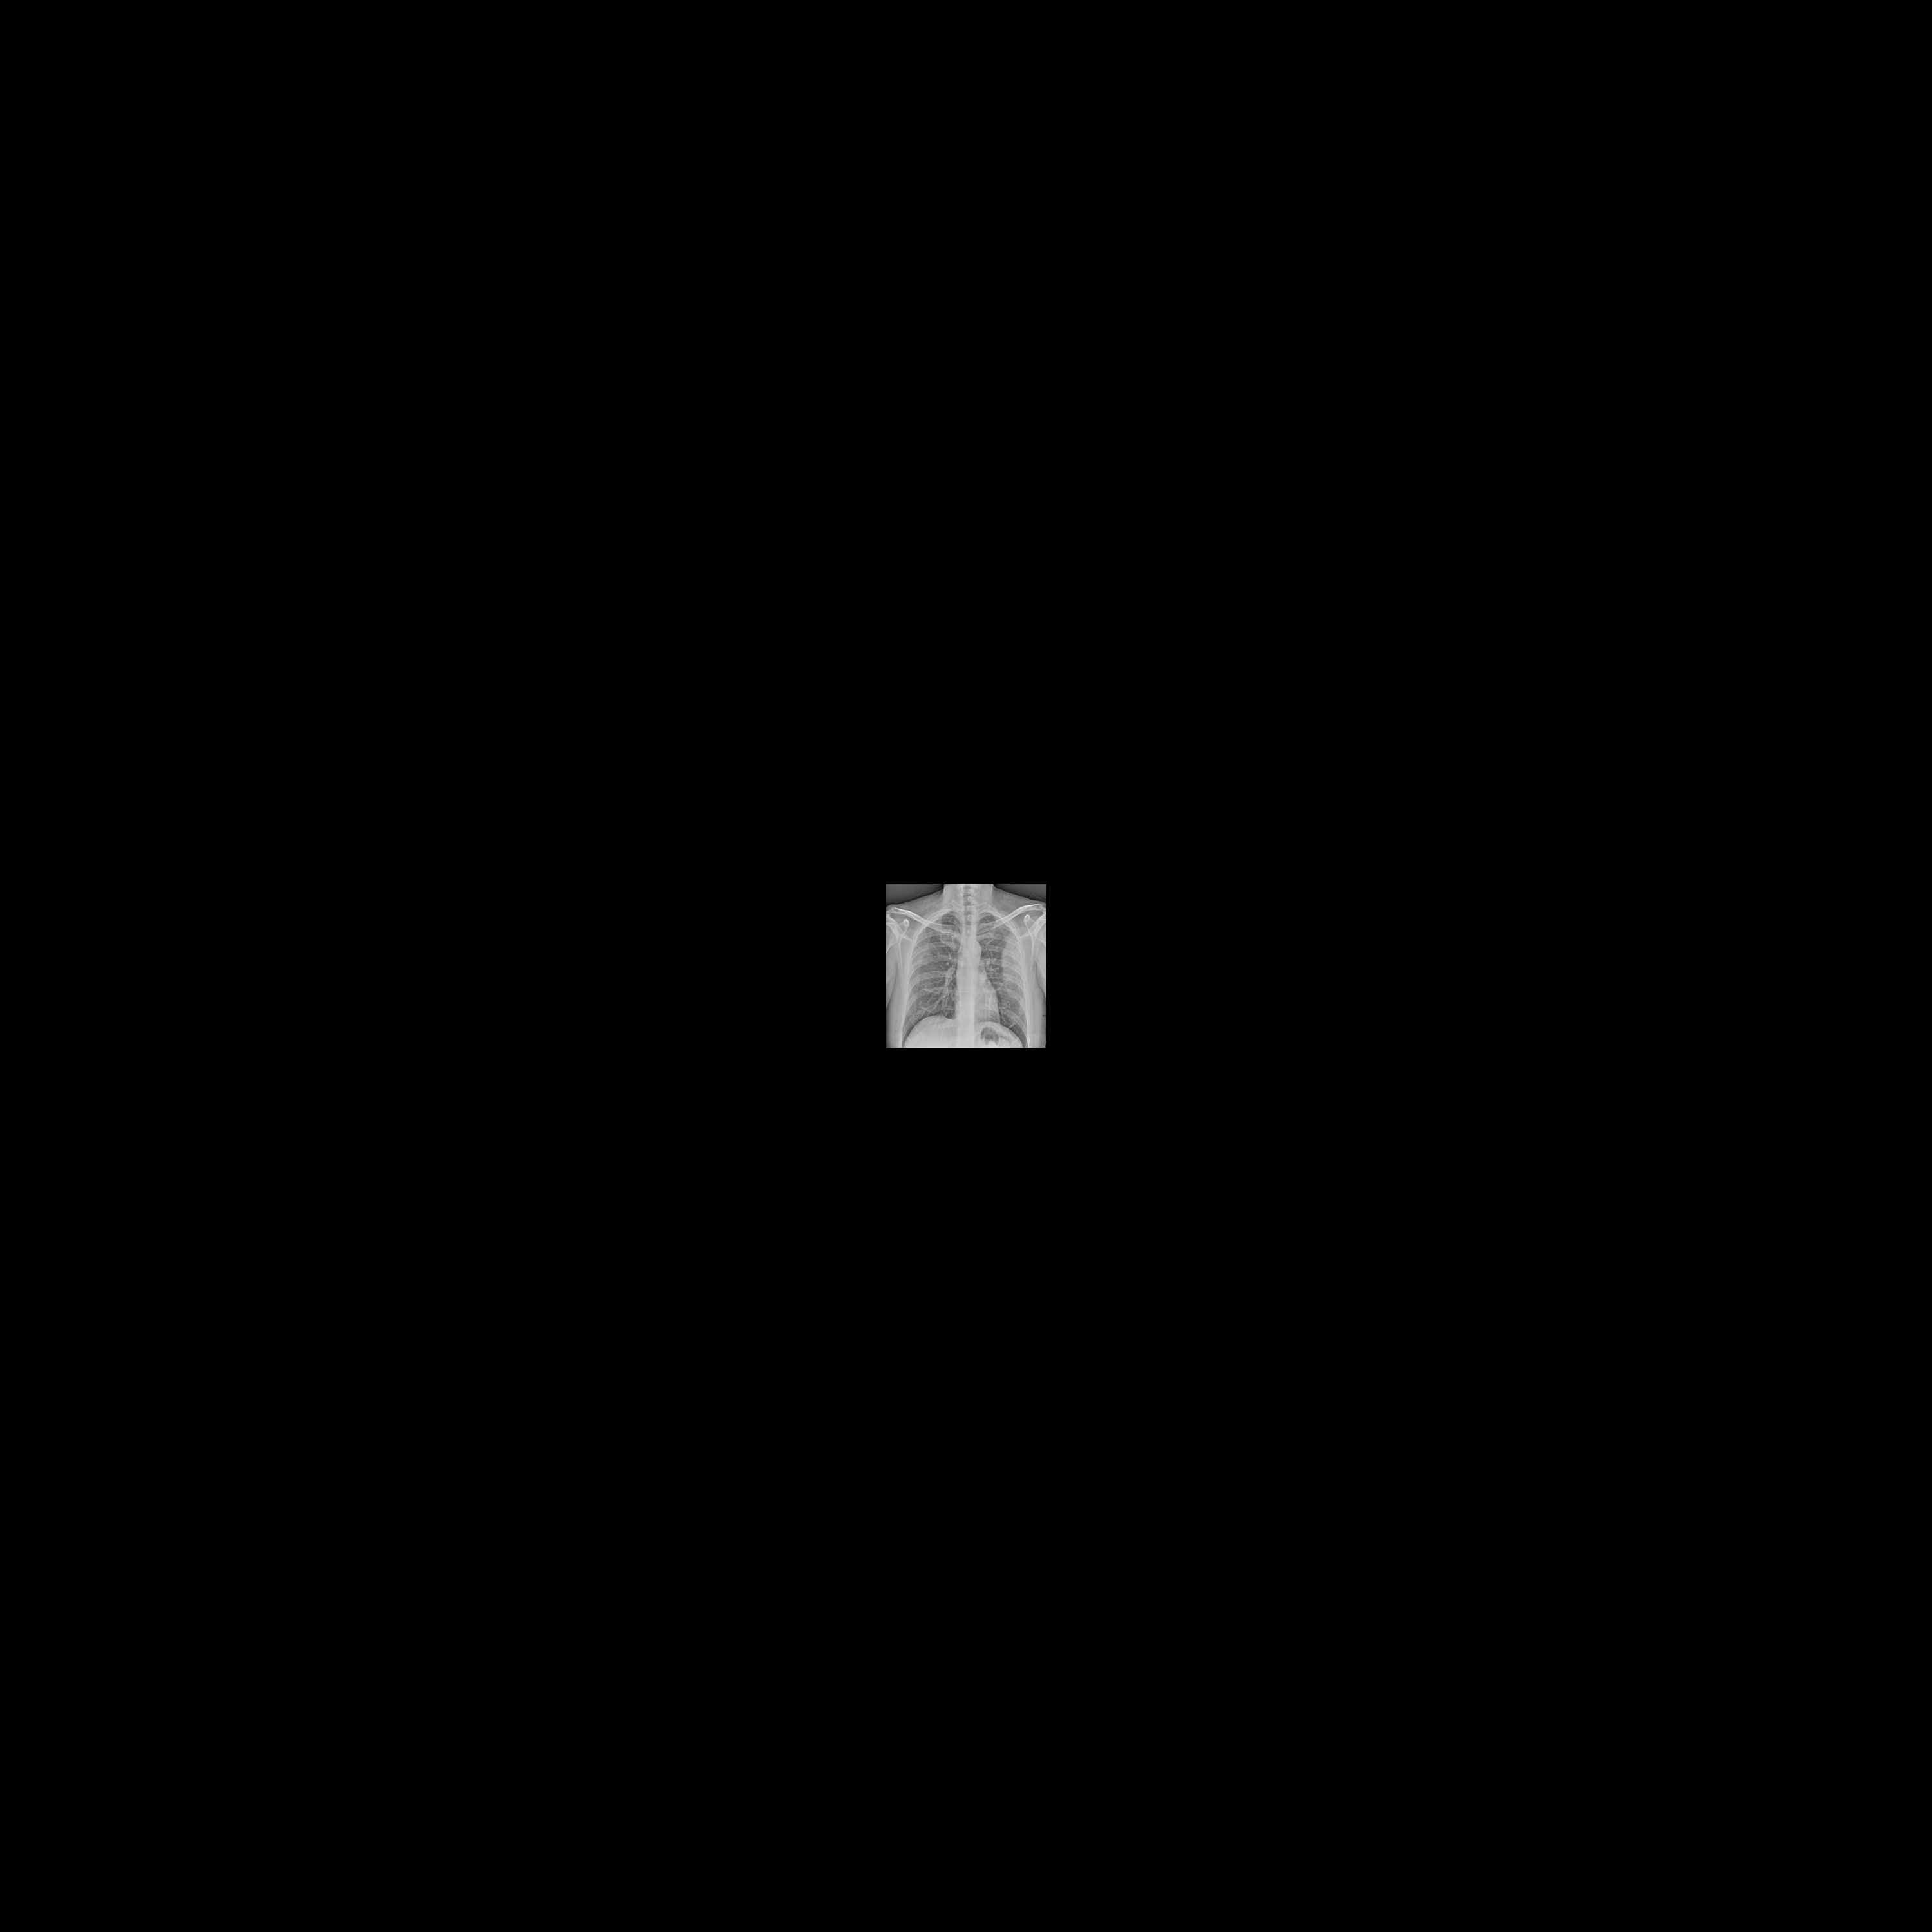

In [ ]:
# get a random image from the dataset and resize it
im = get_random_image(dataset)
#im = transforms.Resize(100)(im)
im

Resize() resizes the smallest side of the image to the number of pixels specified(if 1 parameter is given).

In [ ]:
#transforms.Resize(50)(im)

**Try out other transformations**

How do these transformations alter the image?
- `transforms.ColorJitter`
- `transforms.RandomAffine`
- `transforms.RandomHorizontalFlip`  

You can [read more about these transformations here](https://pytorch.org/docs/stable/torchvision/transforms.html)




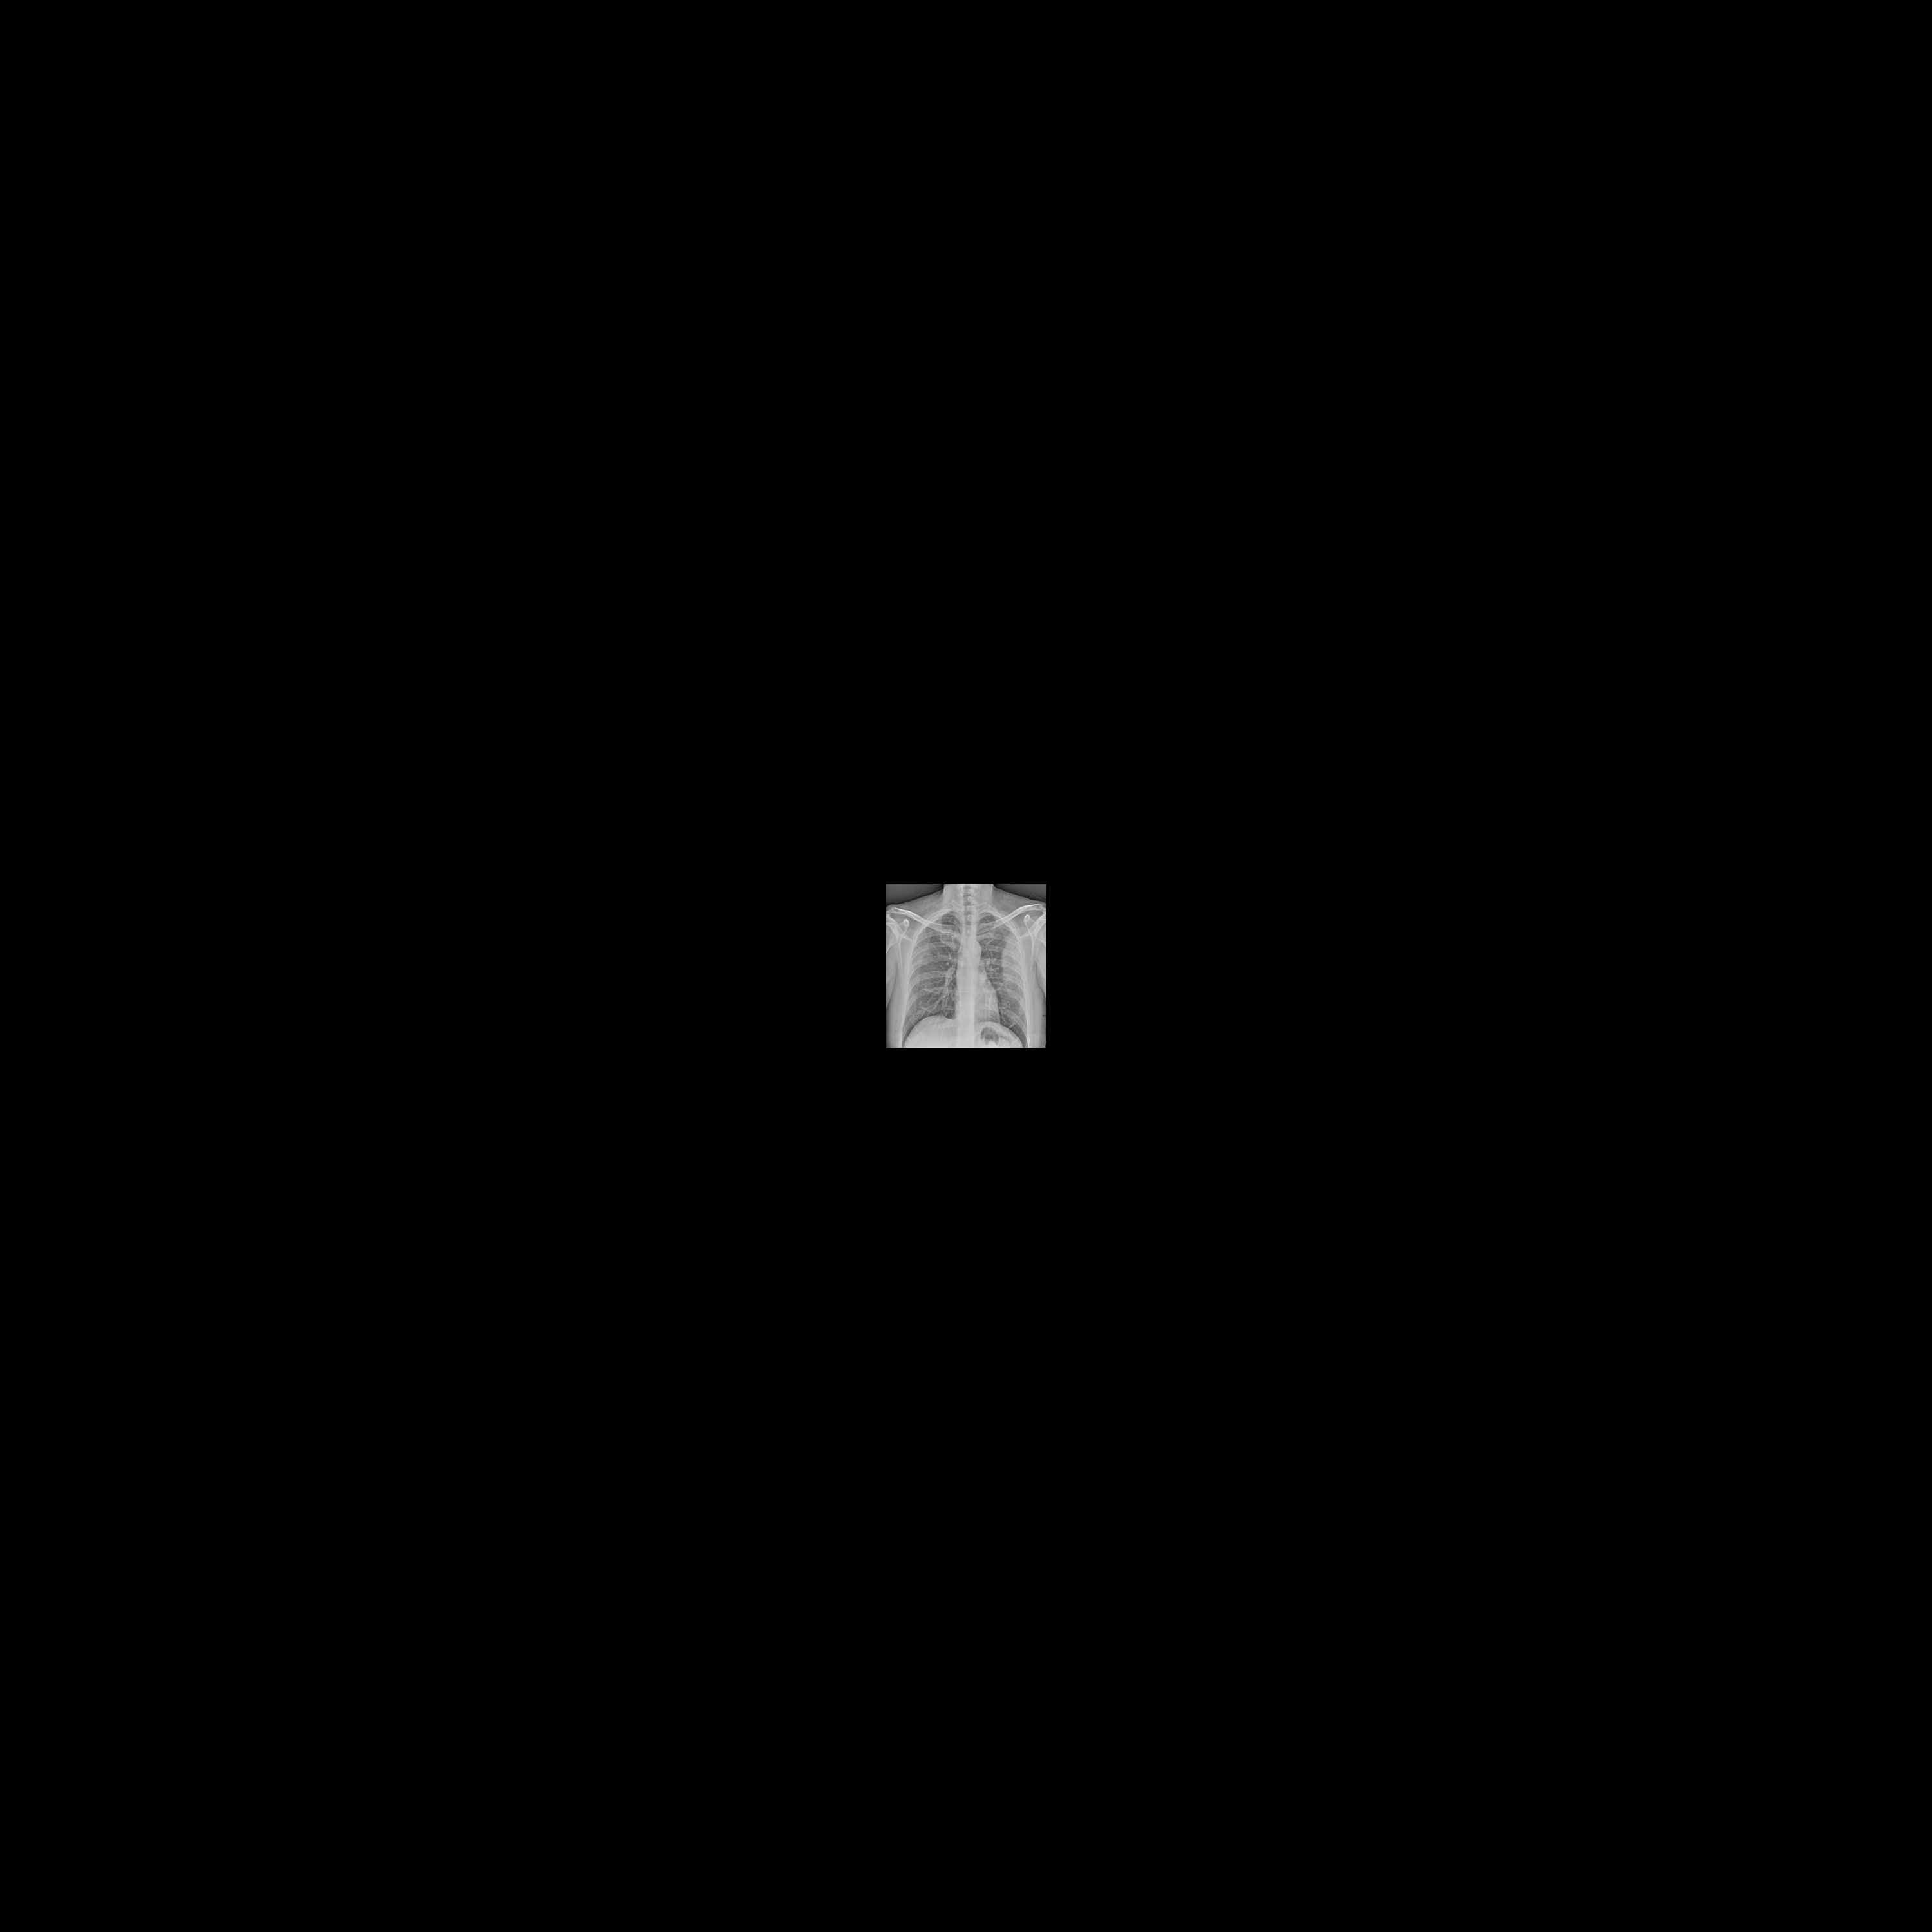

In [ ]:
# EXERCISE: Apply different transformations to images and check out the output
#
# HINT: Use the code above as an example and try transforms functions such as RandomAffine
#im = get_random_image(dataset)

#changes how the image is viewed, values change each time(range of brightness values to choose from)
#im = transforms.ColorJitter(brightness = 0.3, contrast = 0.8, saturation = 0.4, hue = 0)(im)

#changes the rotation/translation/scale factor
#shear -> stretches(keeps all lines straight)
#random values like colorjitter transformation
#im = transforms.RandomAffine(degrees = 0, translate=None, scale=(1.2, 1.2), shear=None, resample=False, fillcolor=0)(im)

#probability of image being flipped -> random outcomes(can be flipped or stays the same)
#im = transforms.RandomHorizontalFlip(p=1.5)(im)
im

Without (im), you can look at the different set of values given

> **Discuss with each other**
> 
> Which transformations could be useful to normalize the dataset? Which transformations could be useful to add diversity to data set?

### Examine image dimensions

Run the code below to calculate the image dimension.

> **Discuss with each other**
>
> Based on the image dimension, are the images greyscale or color images?

In [ ]:
im_sizes = [d[0].size for d in dataset]

dimensions = set([len(s) for s in im_sizes])

print(f'Dimensions in dataset: {dimensions}')

Dimensions in dataset: {2}


Compare x-ray images to another image

Random color image shape: (2963, 4608, 3)
Random xray image shape: (2000, 2000)


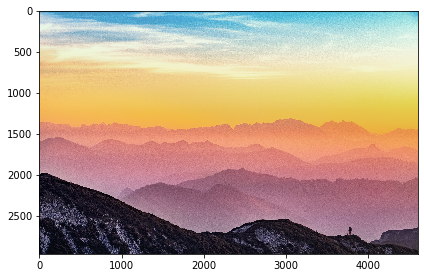

In [ ]:
# Answer the above question before running this block!

from skimage import io
color_image = io.imread('https://unsplash.com/photos/twukN12EN7c/download')
io.imshow(color_image)
print(f'Random color image shape: {color_image.shape}')
print(f'Random xray image shape: {get_random_image(dataset).size}')

**How much do image shapes and sizes vary in the dataset?**

Run the code below to print the image dimensions for a set of random images

In [ ]:
im_num = 10
rand_indices = random.sample(range(len(dataset)), im_num)
subset = Subset(dataset, rand_indices)

print(f'Image dimensions for {im_num} random images')
for d in subset:
    print(d[0].size)

Image dimensions for 10 random images
(390, 320)
(389, 320)
(1168, 1294)
(325, 320)
(320, 334)
(320, 320)
(446, 366)
(369, 320)
(780, 702)
(390, 320)


**Smallest dimension measurements**

Calculate the smallest image width and height in the dataset.

In [ ]:
# EXERCISE: calculate the smallest image width and smallest image height in the
# dataset
#
# HINT: look at blocks above for useful code, use min() to find minimum in a list

#smallest width and smalles size across all images
min_width = 10000000000000
min_height = 10000000000000
for d in dataset:
  if(d[0].width < min_width):
    min_width = d[0].width 
  if(d[0].height < min_height):
    min_height = d[0].height
print(min_width)
print(min_height)

#smalles width/height for a certain image
im_sizes = [d[0].size for d in dataset]
print(min(im_sizes))

255
235
(255, 249)


> **Discuss with each other**
> 
> How should we resize and crop the images? How do the smallest image width and smallest image height constrain our strategy?

The smallest image will look too fuzzy if we try to make the image size too large. We should choose a value in between.

### Resize and crop

To make the images the same shape and size for the learning model, we can apply image transformations when loading the data.

The `transforms.Compose` function puts together a list of image transformations, which are applied in order to the images.

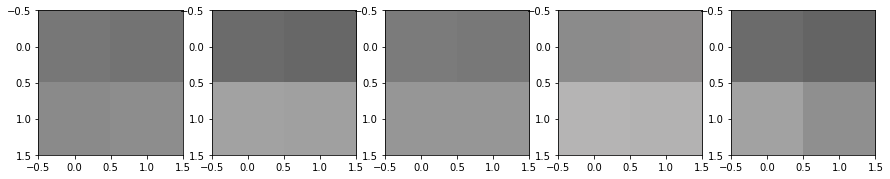

In [ ]:
# EXERCISE: set resize and crop parameters based on your observations above

resize_value = 2
crop_value = 2

# compose transformations
data_transforms = transforms.Compose([
        transforms.Resize(resize_value),
        transforms.CenterCrop(crop_value)])

dataset = datasets.ImageFolder(path_to_images, transform=data_transforms)
imshow_dataset(dataset, n=5, rand=True)

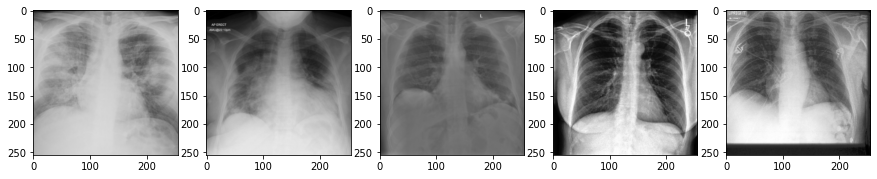

In [ ]:
# EXERCISE: set resize and crop parameters based on your observations above

resize_value = 255
crop_value = 255

# compose transformations
data_transforms = transforms.Compose([
        transforms.Resize(resize_value),
        transforms.CenterCrop(crop_value)])

dataset = datasets.ImageFolder(path_to_images, transform=data_transforms)
imshow_dataset(dataset, n=5, rand=True)

In [ ]:
# EXERCISE: try applying another list of transformations and compare the results



### Normalize images

**Calculate the pixel intensity mean and standard deviation across all images in the dataset.**

Note: This code takes some time to run. The output is 

- Mean: 0.544
- Standard Deviation: 0.237

In [ ]:
data_transforms = transforms.Compose([
        transforms.Resize(resize_value),
        transforms.CenterCrop(crop_value),
        transforms.ToTensor()])

dataset = datasets.ImageFolder(path_to_images, transform=data_transforms)

data_mean, data_std = calc_dataset_stats(dataset)
print(f'Mean: {data_mean:.3f}, Standard Deviation: {data_std:.3f}')

Mean: 0.526, Standard Deviation: 0.116


**Add normalization to the transformation list**

The normalization step is applied on tensors and so is added after the `transforms.ToTensor` step. 

In [ ]:
data_mean = 0.544
data_std = 0.237

data_transforms = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize(resize_value),
        transforms.CenterCrop(crop_value),
        transforms.ToTensor(),
        transforms.Normalize(mean=[data_mean], std=[data_std])])

dataset = datasets.ImageFolder(path_to_images, transform=data_transforms)

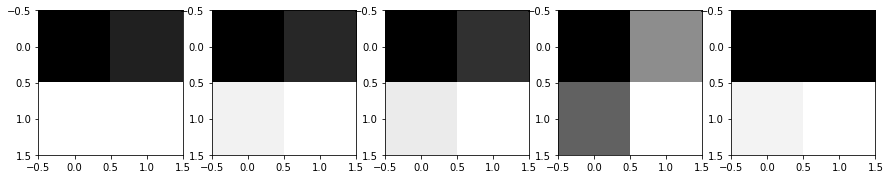

In [ ]:
# EXERCISE: compare the images with all the transformations applied.
imshow_dataset(dataset, n=5, rand=True)